> Investigating correlations between all innovation variables. When interpreting the results, note that distance of search ( individual ) is on the same scale as dissimilarity albeit inversely proportional whereas template similarity, variety, rareness are on a same scale. 

**Metrics in the form of stages**
* Individual Exploration 


In [1]:
# retrieved variables from distance search

%store -r phase12_bogota0
%store -r phase23_bogota0
%store -r phase34_bogota0
%store -r phase45_bogota0

%store -r phase12_bogota1
%store -r phase23_bogota1
%store -r phase34_bogota1
%store -r phase45_bogota1

%store -r phase12_bogota2
%store -r phase23_bogota2
%store -r phase34_bogota2
%store -r phase45_bogota2

%store -r phase12_bogota3
%store -r phase23_bogota3
%store -r phase34_bogota3
%store -r phase45_bogota3

In [2]:
# retrived variables from relational novelty

%store -r stage1_bogota0_high_similarity
%store -r stage1_bogota1_high_similarity
%store -r stage1_bogota2_high_similarity
%store -r stage1_bogota3_high_similarity

%store -r stage2_bogota0_high_similarity
%store -r stage2_bogota1_high_similarity
%store -r stage2_bogota2_high_similarity
%store -r stage2_bogota3_high_similarity

%store -r stage3_bogota0_high_similarity
%store -r stage3_bogota1_high_similarity
%store -r stage3_bogota2_high_similarity
%store -r stage3_bogota3_high_similarity

%store -r stage4_bogota0_high_similarity
%store -r stage4_bogota1_high_similarity
%store -r stage4_bogota2_high_similarity
%store -r stage4_bogota3_high_similarity

In [3]:
# retrieved from functional variety notebook 

%store -r overall_phase1_bogota0
%store -r overall_phase2_bogota0
%store -r overall_phase3_bogota0
%store -r overall_phase4_bogota0
%store -r overall_phase5_bogota0

%store -r overall_phase1_bogota1
%store -r overall_phase2_bogota1
%store -r overall_phase3_bogota1
%store -r overall_phase4_bogota1
%store -r overall_phase5_bogota1

%store -r overall_phase1_bogota2
%store -r overall_phase2_bogota2
%store -r overall_phase3_bogota2
%store -r overall_phase4_bogota2
%store -r overall_phase5_bogota2

%store -r overall_phase1_bogota3
%store -r overall_phase2_bogota3
%store -r overall_phase3_bogota3
%store -r overall_phase4_bogota3
%store -r overall_phase5_bogota3

In [4]:
# retrieve variables from rareness notebook

%store -r group0_phase1_match10
%store -r group0_phase2_match10
%store -r group0_phase3_match10
%store -r group0_phase4_match10
%store -r group0_phase5_match10

%store -r group1_phase1_match10
%store -r group1_phase2_match10
%store -r group1_phase3_match10
%store -r group1_phase4_match10
%store -r group1_phase5_match10

%store -r group2_phase1_match10
%store -r group2_phase2_match10
%store -r group2_phase3_match10
%store -r group2_phase4_match10
%store -r group2_phase5_match10

%store -r group3_phase1_match10
%store -r group3_phase2_match10
%store -r group3_phase3_match10
%store -r group3_phase4_match10
%store -r group3_phase5_match10

In [5]:
stage1_bogota0_high_similarity['similarity'] = 1 - stage1_bogota0_high_similarity['similarity']
stage2_bogota0_high_similarity['similarity'] = 1 - stage2_bogota0_high_similarity['similarity']
stage3_bogota0_high_similarity['similarity'] = 1 - stage3_bogota0_high_similarity['similarity']
stage4_bogota0_high_similarity['similarity'] = 1 - stage4_bogota0_high_similarity['similarity']

stage1_bogota1_high_similarity['similarity'] = 1 - stage1_bogota1_high_similarity['similarity']
stage2_bogota1_high_similarity['similarity'] = 1 - stage2_bogota1_high_similarity['similarity']
stage3_bogota1_high_similarity['similarity'] = 1 - stage3_bogota1_high_similarity['similarity']
stage4_bogota1_high_similarity['similarity'] = 1 - stage4_bogota1_high_similarity['similarity']

stage1_bogota2_high_similarity['similarity'] = 1 - stage1_bogota2_high_similarity['similarity']
stage2_bogota2_high_similarity['similarity'] = 1 - stage2_bogota2_high_similarity['similarity']
stage3_bogota2_high_similarity['similarity'] = 1 - stage3_bogota2_high_similarity['similarity']
stage4_bogota2_high_similarity['similarity'] = 1 - stage4_bogota2_high_similarity['similarity']

stage1_bogota3_high_similarity['similarity'] = 1 - stage1_bogota3_high_similarity['similarity']
stage2_bogota3_high_similarity['similarity'] = 1 - stage2_bogota3_high_similarity['similarity']
stage3_bogota3_high_similarity['similarity'] = 1 - stage3_bogota3_high_similarity['similarity']
stage4_bogota3_high_similarity['similarity'] = 1 - stage4_bogota3_high_similarity['similarity']

In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import functools

In [7]:
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix


def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(18, 16))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})

## Bogota 0 Correlations

In [8]:
stage1_bogota0_high_similarity.rename(columns={'similarity': 's1-dissimilar'}, inplace=True)
stage2_bogota0_high_similarity.rename(columns={'similarity': 's2-dissimilar'}, inplace=True)
stage3_bogota0_high_similarity.rename(columns={'similarity': 's3-dissimilar'}, inplace=True)
stage4_bogota0_high_similarity.rename(columns={'similarity': 's4-dissimilar'}, inplace=True)

overall_phase1_bogota0.rename(columns={'len_unique': 'p1-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase2_bogota0.rename(columns={'len_unique': 'p2-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase3_bogota0.rename(columns={'len_unique': 'p3-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase4_bogota0.rename(columns={'len_unique': 'p4-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase5_bogota0.rename(columns={'len_unique': 'p5-len-unique', 'Student': 'user2'}, inplace=True)

group0_phase1_match10.rename(columns={'len_match': 'p1-len-rare', 'Student': 'user2'}, inplace=True)
group0_phase2_match10.rename(columns={'len_match': 'p2-len-rare', 'Student': 'user2'}, inplace=True)
group0_phase3_match10.rename(columns={'len_match': 'p3-len-rare', 'Student': 'user2'}, inplace=True)
group0_phase4_match10.rename(columns={'len_match': 'p4-len-rare', 'Student': 'user2'}, inplace=True)
group0_phase5_match10.rename(columns={'len_match': 'p5-len-rare', 'Student': 'user2'}, inplace=True)

group0_phase1_match10['p1-len-rare'] = group0_phase1_match10['p1-len-rare'].fillna(0)
group0_phase2_match10['p2-len-rare'] = group0_phase2_match10['p2-len-rare'].fillna(0)
group0_phase3_match10['p3-len-rare'] = group0_phase3_match10['p3-len-rare'].fillna(0)
group0_phase4_match10['p4-len-rare'] = group0_phase4_match10['p4-len-rare'].fillna(0)
group0_phase5_match10['p5-len-rare'] = group0_phase5_match10['p5-len-rare'].fillna(0)

group0_phase1_match10 = group0_phase1_match10.drop('Group', axis=1)
group0_phase2_match10 = group0_phase2_match10.drop('Group', axis=1)
group0_phase3_match10 = group0_phase3_match10.drop('Group', axis=1)
group0_phase4_match10 = group0_phase4_match10.drop('Group', axis=1)
group0_phase5_match10 = group0_phase5_match10.drop('Group', axis=1)

In [9]:
phase12_bogota0.rename(columns={'similarity': 's1-ind-dist'}, inplace=True)
phase23_bogota0.rename(columns={'similarity': 's2-ind-dist'}, inplace=True)
phase34_bogota0.rename(columns={'similarity': 's3-ind-dist'}, inplace=True)
phase45_bogota0.rename(columns={'similarity': 's4-ind-dist'}, inplace=True)

In [10]:
dfs = [stage1_bogota0_high_similarity[['user2', 's1-dissimilar']], stage2_bogota0_high_similarity[['user2', 's2-dissimilar']],  stage3_bogota0_high_similarity[['user2', 's3-dissimilar']],  stage4_bogota0_high_similarity[['user2', 's4-dissimilar']], 
       phase12_bogota0[['user2', 's1-ind-dist']], phase23_bogota0[['user2', 's2-ind-dist']], phase34_bogota0[['user2', 's3-ind-dist']], phase45_bogota0[['user2', 's4-ind-dist']]]

df_final = functools.reduce(lambda left, right: pd.merge(left,right,on='user2'), dfs)
bogota0_stage_metrics = df_final.drop('user2', axis=1)

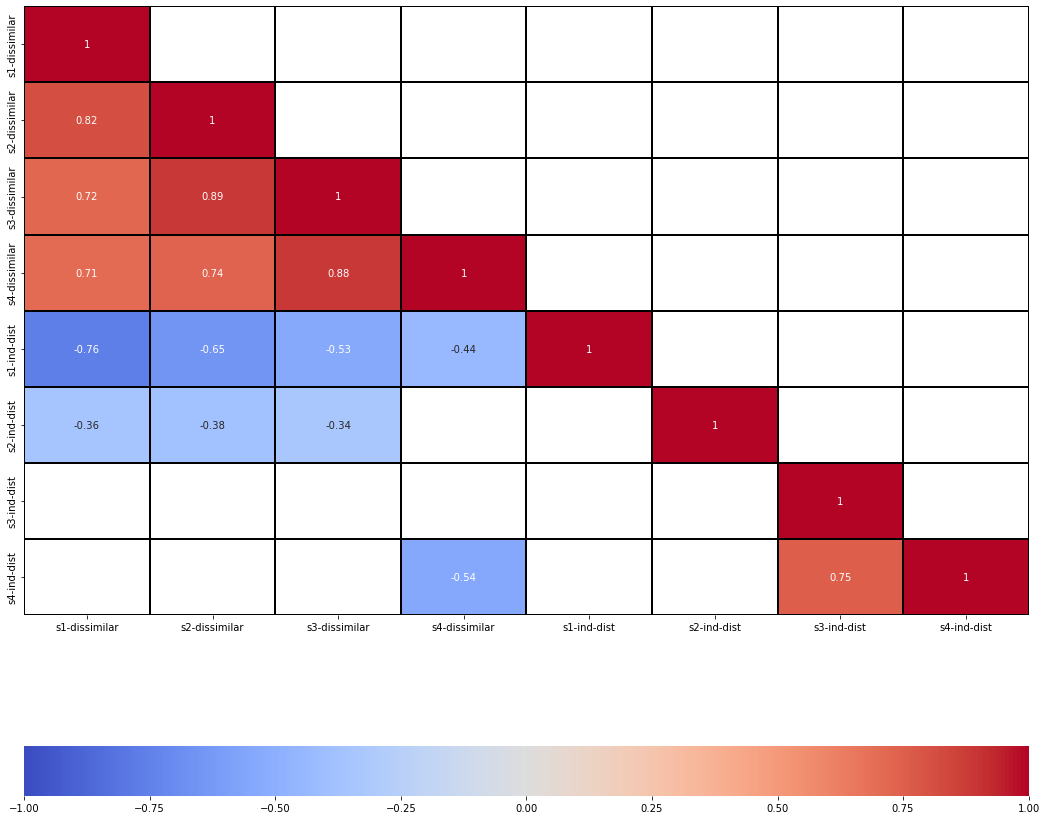

In [11]:
corr = bogota0_stage_metrics.corr(method='spearman')                            # get correlation
p_values = corr_sig(bogota0_stage_metrics)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

In [12]:
dfs = [overall_phase1_bogota0[['user2', 'p1-len-unique']], overall_phase2_bogota0[['user2', 'p2-len-unique']], overall_phase3_bogota0[['user2', 'p3-len-unique']], overall_phase4_bogota0[['user2', 'p4-len-unique']], overall_phase5_bogota0[['user2', 'p5-len-unique']], 
      group0_phase1_match10[['user2', 'p1-len-rare']], group0_phase2_match10[['user2', 'p2-len-rare']], group0_phase3_match10[['user2', 'p3-len-rare']], group0_phase4_match10[['user2', 'p4-len-rare']], group0_phase5_match10[['user2', 'p5-len-rare']]]

df_final = functools.reduce(lambda left, right: pd.merge(left,right,on='user2'), dfs)
bogota0_phase_metrics = df_final.drop('user2', axis=1)

In [13]:
bogota0_phase_metrics

,p1-len-unique,p2-len-unique,p3-len-unique,p4-len-unique,p5-len-unique,p1-len-rare,p2-len-rare,p3-len-rare,p4-len-rare,p5-len-rare
0,21.0,30.0,30.0,106.0,116.0,0.0,2.0,2.0,27.0,34.0
1,5.0,25.0,2273.0,2290.0,2297.0,0.0,1.0,2.0,6.0,7.0
2,4.0,24.0,24.0,2844.0,2312.0,0.0,0.0,0.0,12.0,30.0
3,40.0,80.0,133.0,138.0,210.0,0.0,0.0,4.0,8.0,17.0
4,7.0,42.0,72.0,81.0,80.0,0.0,2.0,2.0,3.0,6.0
5,40.0,41.0,41.0,66.0,90.0,0.0,0.0,0.0,10.0,15.0
6,23.0,35.0,52.0,63.0,66.0,2.0,2.0,0.0,13.0,13.0
7,39.0,39.0,78.0,80.0,90.0,1.0,1.0,2.0,1.0,13.0
8,3.0,47.0,49.0,49.0,49.0,0.0,0.0,0.0,0.0,0.0
9,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0


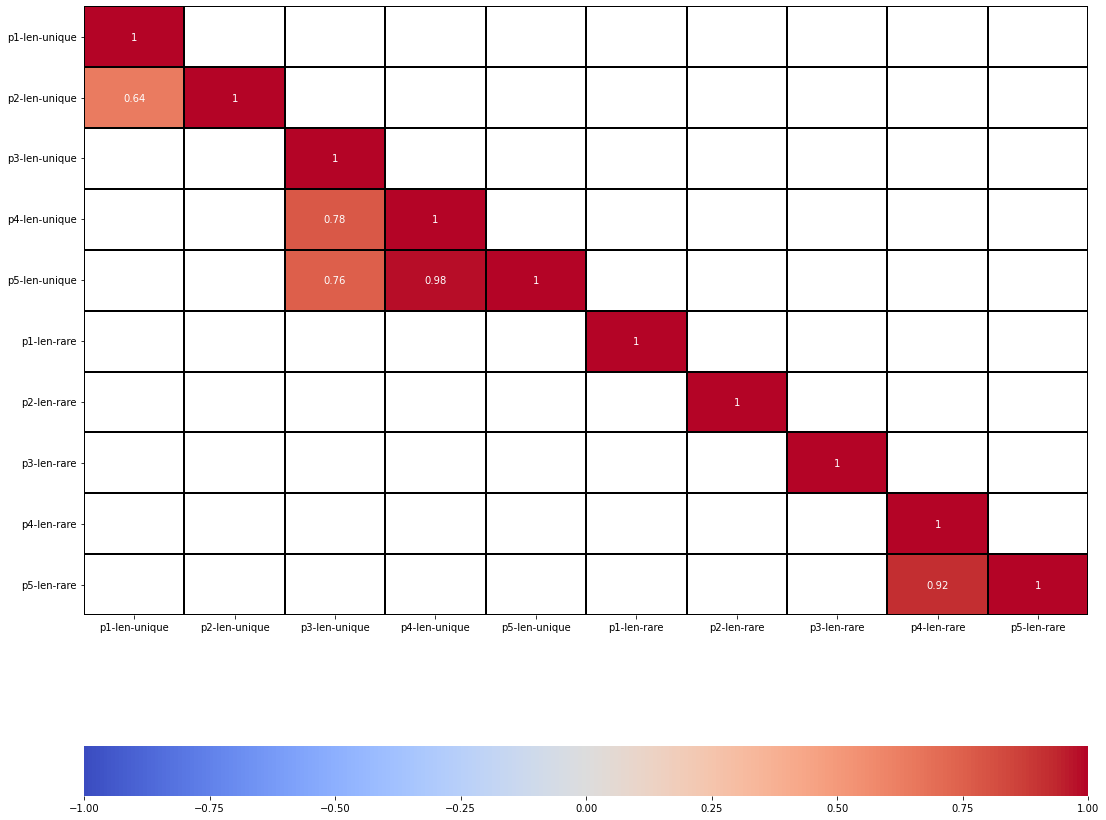

In [14]:
corr = bogota0_phase_metrics.corr(method='spearman')                            # get correlation
p_values = corr_sig(bogota0_phase_metrics)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Bogota 1 Correlations

In [15]:
stage1_bogota1_high_similarity.rename(columns={'similarity': 's1-dissimilar'}, inplace=True)
stage2_bogota1_high_similarity.rename(columns={'similarity': 's2-dissimilar'}, inplace=True)
stage3_bogota1_high_similarity.rename(columns={'similarity': 's3-dissimilar'}, inplace=True)
stage4_bogota1_high_similarity.rename(columns={'similarity': 's4-dissimilar'}, inplace=True)

overall_phase1_bogota1.rename(columns={'len_unique': 'p1-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase2_bogota1.rename(columns={'len_unique': 'p2-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase3_bogota1.rename(columns={'len_unique': 'p3-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase4_bogota1.rename(columns={'len_unique': 'p4-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase5_bogota1.rename(columns={'len_unique': 'p5-len-unique', 'Student': 'user2'}, inplace=True)

In [16]:
phase12_bogota1.rename(columns={'similarity': 's1-ind-dist'}, inplace=True)
phase23_bogota1.rename(columns={'similarity': 's2-ind-dist'}, inplace=True)
phase34_bogota1.rename(columns={'similarity': 's3-ind-dist'}, inplace=True)
phase45_bogota1.rename(columns={'similarity': 's4-ind-dist'}, inplace=True)

In [17]:
dfs = [stage1_bogota1_high_similarity[['user2', 's1-dissimilar']], stage2_bogota1_high_similarity[['user2', 's2-dissimilar']],  stage3_bogota1_high_similarity[['user2', 's3-dissimilar']],  stage4_bogota1_high_similarity[['user2', 's4-dissimilar']], 
       phase12_bogota1[['user2', 's1-ind-dist']], phase23_bogota1[['user2', 's2-ind-dist']], phase34_bogota1[['user2', 's3-ind-dist']], phase45_bogota1[['user2', 's4-ind-dist']], 
      overall_phase1_bogota1[['user2', 'p1-len-unique']], overall_phase2_bogota1[['user2', 'p2-len-unique']], overall_phase3_bogota1[['user2', 'p3-len-unique']], overall_phase4_bogota1[['user2', 'p4-len-unique']], overall_phase5_bogota1[['user2', 'p5-len-unique']]]

df_final = functools.reduce(lambda left, right: pd.merge(left,right,on='user2'), dfs)
bogota1_stage_metrics = df_final.drop('user2', axis=1)

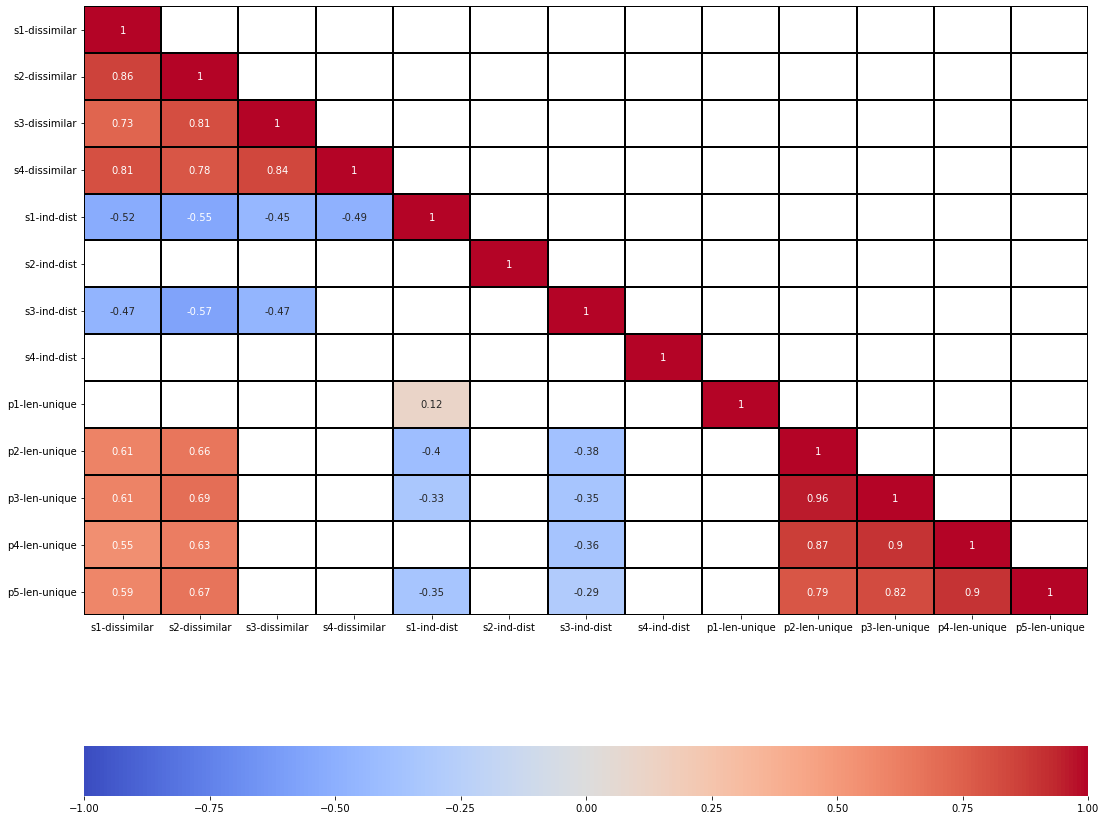

In [18]:
corr = bogota1_stage_metrics.corr(method='spearman')                            # get correlation
p_values = corr_sig(bogota1_stage_metrics)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Bogota 2 Correlations

In [19]:
stage1_bogota2_high_similarity.rename(columns={'similarity': 's1-dissimilar'}, inplace=True)
stage2_bogota2_high_similarity.rename(columns={'similarity': 's2-dissimilar'}, inplace=True)
stage3_bogota2_high_similarity.rename(columns={'similarity': 's3-dissimilar'}, inplace=True)
stage4_bogota2_high_similarity.rename(columns={'similarity': 's4-dissimilar'}, inplace=True)

overall_phase1_bogota2.rename(columns={'len_unique': 'p1-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase2_bogota2.rename(columns={'len_unique': 'p2-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase3_bogota2.rename(columns={'len_unique': 'p3-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase4_bogota2.rename(columns={'len_unique': 'p4-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase5_bogota2.rename(columns={'len_unique': 'p5-len-unique', 'Student': 'user2'}, inplace=True)

In [20]:
phase12_bogota2.rename(columns={'similarity': 's1-ind-dist'}, inplace=True)
phase23_bogota2.rename(columns={'similarity': 's2-ind-dist'}, inplace=True)
phase34_bogota2.rename(columns={'similarity': 's3-ind-dist'}, inplace=True)
phase45_bogota2.rename(columns={'similarity': 's4-ind-dist'}, inplace=True)

In [21]:
dfs = [stage1_bogota2_high_similarity[['user2', 's1-dissimilar']], stage2_bogota2_high_similarity[['user2', 's2-dissimilar']],  stage3_bogota2_high_similarity[['user2', 's3-dissimilar']],  stage4_bogota2_high_similarity[['user2', 's4-dissimilar']], 
       phase12_bogota2[['user2', 's1-ind-dist']], phase23_bogota2[['user2', 's2-ind-dist']], phase34_bogota2[['user2', 's3-ind-dist']], phase45_bogota2[['user2', 's4-ind-dist']], 
       overall_phase1_bogota2[['user2', 'p1-len-unique']], overall_phase2_bogota2[['user2', 'p2-len-unique']], overall_phase3_bogota2[['user2', 'p3-len-unique']], overall_phase4_bogota2[['user2', 'p4-len-unique']], overall_phase5_bogota2[['user2', 'p5-len-unique']]]

df_final = functools.reduce(lambda left, right: pd.merge(left,right,on='user2'), dfs)
bogota2_stage_metrics = df_final.drop('user2', axis=1)

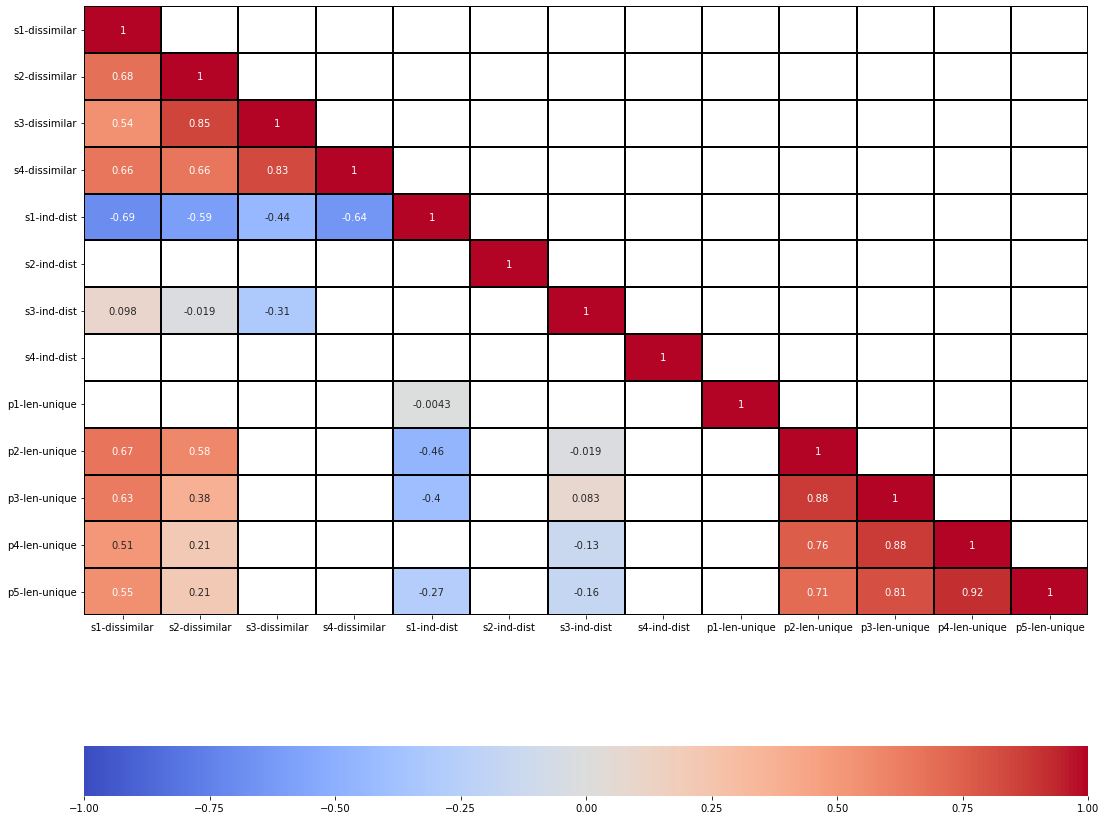

In [22]:
corr = bogota2_stage_metrics.corr(method='spearman')                            # get correlation
p_values = corr_sig(bogota1_stage_metrics)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Bogota 3 Correlations

In [23]:
stage1_bogota3_high_similarity.rename(columns={'similarity': 's1-dissimilar'}, inplace=True)
stage2_bogota3_high_similarity.rename(columns={'similarity': 's2-dissimilar'}, inplace=True)
stage3_bogota3_high_similarity.rename(columns={'similarity': 's3-dissimilar'}, inplace=True)
stage4_bogota3_high_similarity.rename(columns={'similarity': 's4-dissimilar'}, inplace=True)

overall_phase1_bogota3.rename(columns={'len_unique': 'p1-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase2_bogota3.rename(columns={'len_unique': 'p2-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase3_bogota3.rename(columns={'len_unique': 'p3-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase4_bogota3.rename(columns={'len_unique': 'p4-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase5_bogota3.rename(columns={'len_unique': 'p5-len-unique', 'Student': 'user2'}, inplace=True)

In [24]:
phase12_bogota3.rename(columns={'similarity': 's1-ind-dist'}, inplace=True)
phase23_bogota3.rename(columns={'similarity': 's2-ind-dist'}, inplace=True)
phase34_bogota3.rename(columns={'similarity': 's3-ind-dist'}, inplace=True)
phase45_bogota3.rename(columns={'similarity': 's4-ind-dist'}, inplace=True)

In [25]:
dfs = [stage1_bogota3_high_similarity[['user2', 's1-dissimilar']], stage2_bogota3_high_similarity[['user2', 's2-dissimilar']],  stage3_bogota3_high_similarity[['user2', 's3-dissimilar']],  stage4_bogota3_high_similarity[['user2', 's4-dissimilar']], 
       phase12_bogota3[['user2', 's1-ind-dist']], phase23_bogota3[['user2', 's2-ind-dist']], phase34_bogota3[['user2', 's3-ind-dist']], phase45_bogota3[['user2', 's4-ind-dist']], 
      overall_phase1_bogota3[['user2', 'p1-len-unique']], overall_phase2_bogota3[['user2', 'p2-len-unique']], overall_phase3_bogota3[['user2', 'p3-len-unique']], overall_phase4_bogota3[['user2', 'p4-len-unique']], overall_phase5_bogota3[['user2', 'p5-len-unique']]]

df_final = functools.reduce(lambda left, right: pd.merge(left,right,on='user2'), dfs)
bogota3_stage_metrics = df_final.drop('user2', axis=1)

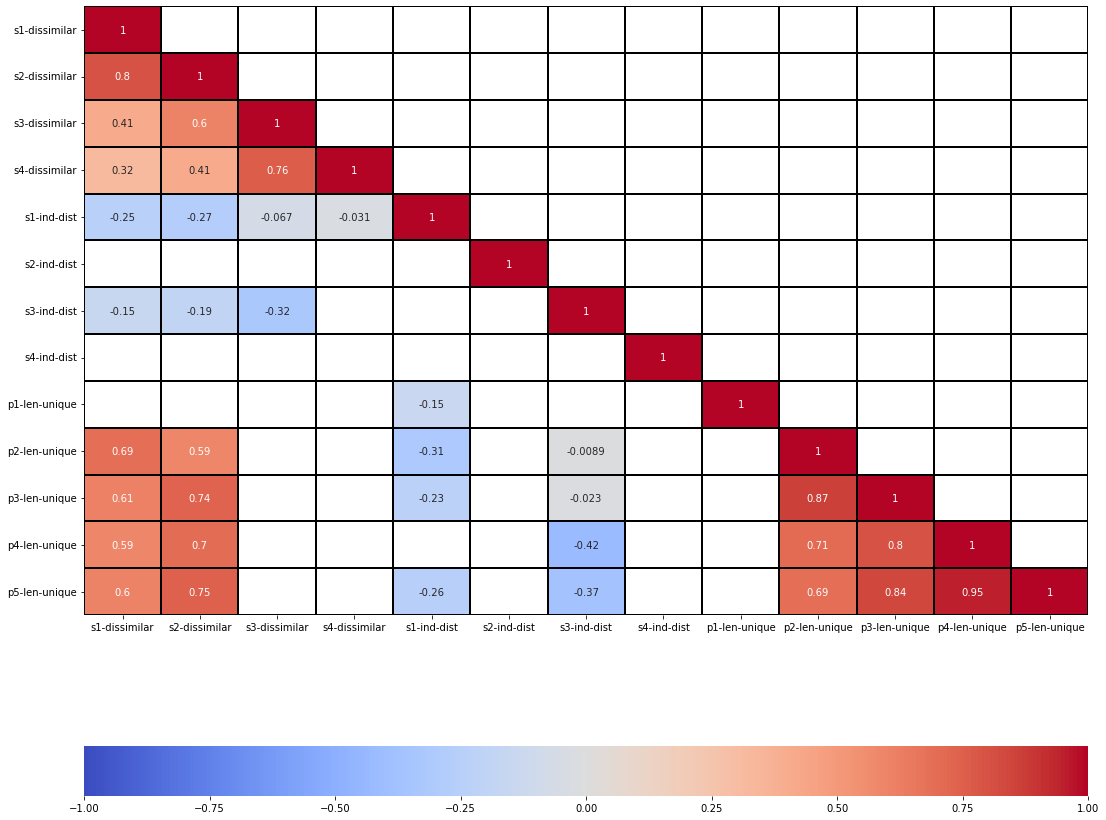

In [26]:
corr = bogota3_stage_metrics.corr(method='spearman')                            # get correlation
p_values = corr_sig(bogota1_stage_metrics)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)